In [1]:
from __future__ import print_function
import os
import neat

import pandas as pd
import numpy as np
import random

import torch
import torch.nn as nn
import torch.optim as optim


from explaneat.core.backprop import NeatNet
from explaneat.core import backprop
from explaneat.core.backproppop import BackpropPopulation
from explaneat.visualization import visualize
from explaneat.core.experiment import ExperimentReporter
from explaneat.core.utility import one_hot_encode


from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from copy import deepcopy

import time
from datetime import datetime


import gzip
try:
    import cPickle as pickle  # pylint: disable=import-error
except ImportError:
    import pickle  # pylint: disable=import-error

In [2]:
from sklearn.metrics import classification_report, confusion_matrix


In [82]:
filePath = './../data/experiments/iris/experiment-epochs-10-3/fullStatus.xplnt'
# filePath = './../data/experiments/iris/experiment-longsepochs-10-17/fullStatus.xplnt'
# filePath = './../data/experiments/iris/experiment-longepochsttsplit-10-0/fullStatus.xplnt'
# filePath = './../data/experiments/breast-cancer/experiment-longepochsttsplit-10-0/fullStatus.xplnt'
# filePath = './../data/experiments/breast-cancer/experiment-longepochsttsplit-10-0/fullStatus.xplnt'


In [83]:
with gzip.open(filePath, 'rb') as f: 
    data = pickle.load(f)     

In [84]:
# data = (p, g, ancestry, ancestors, random.getstate())
data

(<explaneat.core.backproppop.BackpropPopulation at 0x7fda0c42c908>,
 {49: {1491: 1.5605883598327637},
  48: {1491: 1.5605883598327637},
  47: {1491: 1.5605883598327637},
  46: {1491: 1.5605883598327637},
  45: {1450: 1.5589274168014526,
   1491: 1.5605883598327637,
   1382: 1.5589287281036377},
  44: {1450: 1.5589274168014526, 1382: 1.5589287281036377},
  43: {1382: 1.5589287281036377},
  42: {1353: 1.5577592849731445, 1382: 1.5589287281036377},
  41: {1353: 1.5577592849731445,
   1171: 1.5554625988006592,
   1278: 1.5577592849731445},
  40: {1171: 1.5554625988006592, 1278: 1.5577592849731445},
  39: {1171: 1.5554625988006592, 1278: 1.5577592849731445},
  38: {1171: 1.5554625988006592},
  37: {1171: 1.5554625988006592},
  36: {1171: 1.5554625988006592, 940: 1.5469787120819092},
  35: {1072: 1.5469787120819092, 940: 1.5469787120819092},
  34: {1072: 1.5469787120819092, 940: 1.5469787120819092},
  33: {1072: 1.5469787120819092,
   940: 1.5469787120819092,
   1031: 1.5326818227767944},
  

In [85]:
p, g, ancestry, ancestors, randomState = data

In [7]:
pop = data[0]

In [8]:
g = data[3][1]

In [9]:
data[0].reporters.reporters[3].ancestry[86]['genome'].fitness

1.0213549137115479

In [10]:
data[0].reporters.reporters[1]

In [11]:
# visualize.create_ancestry_video(
#     data[0].config,
#     data[1],
#     data[2],
#     data[3],
#     data[0].reporters.reporters[1]
#         )

Fitness for gen 0
Fitness for gen 1
Fitness for gen 2
Fitness for gen 3
Fitness for gen 4
Fitness for gen 5
Fitness for gen 6
Fitness for gen 7
Fitness for gen 8
Fitness for gen 9
Fitness for gen 10
Fitness for gen 11
Fitness for gen 12
Fitness for gen 13
Fitness for gen 14
Fitness for gen 15
Fitness for gen 16
Fitness for gen 17
Fitness for gen 18
Fitness for gen 19
Fitness for gen 20
Fitness for gen 21
Fitness for gen 22
Fitness for gen 23
Fitness for gen 24
Fitness for gen 25
Fitness for gen 26
Fitness for gen 27
Fitness for gen 28
Fitness for gen 29
Fitness for gen 30
Fitness for gen 31
Fitness for gen 32
Fitness for gen 33
Fitness for gen 34
Fitness for gen 35
Fitness for gen 36
Fitness for gen 37
Fitness for gen 38
Fitness for gen 39
Fitness for gen 40
Fitness for gen 41
Fitness for gen 42
Fitness for gen 43
Fitness for gen 44
Fitness for gen 45
Fitness for gen 46
Fitness for gen 47
Fitness for gen 48
Fitness for gen 49
49
{1491: 1.5605883598327637}
48
{1491: 1.5605883598327637}


KeyboardInterrupt: 

In [12]:

from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [13]:
breast_cancer = datasets.load_breast_cancer()

In [14]:
iris = datasets.load_iris()
xs_raw = iris.data[:, :]
scaler = StandardScaler()
scaler.fit(xs_raw)
xs = scaler.transform(xs_raw)
ys = iris.target
ys_onehot = one_hot_encode(ys)

In [15]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
xs

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [18]:
irisdf = pd.DataFrame(xs_raw)
irisdf.columns = iris.feature_names

In [19]:
irisdf['target'] = ys

In [20]:
import matplotlib

/opt/conda/lib/python3.6/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


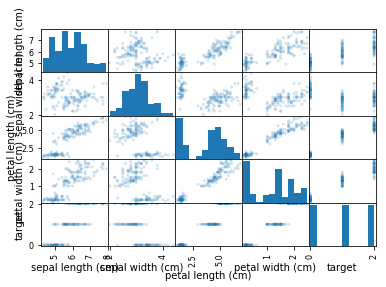

In [21]:
import matplotlib.pyplot as plt 

axes = pd.plotting.scatter_matrix(irisdf, alpha=0.2)
plt.tight_layout()
plt.show()


In [22]:
import seaborn as sns

In [23]:
irisdf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


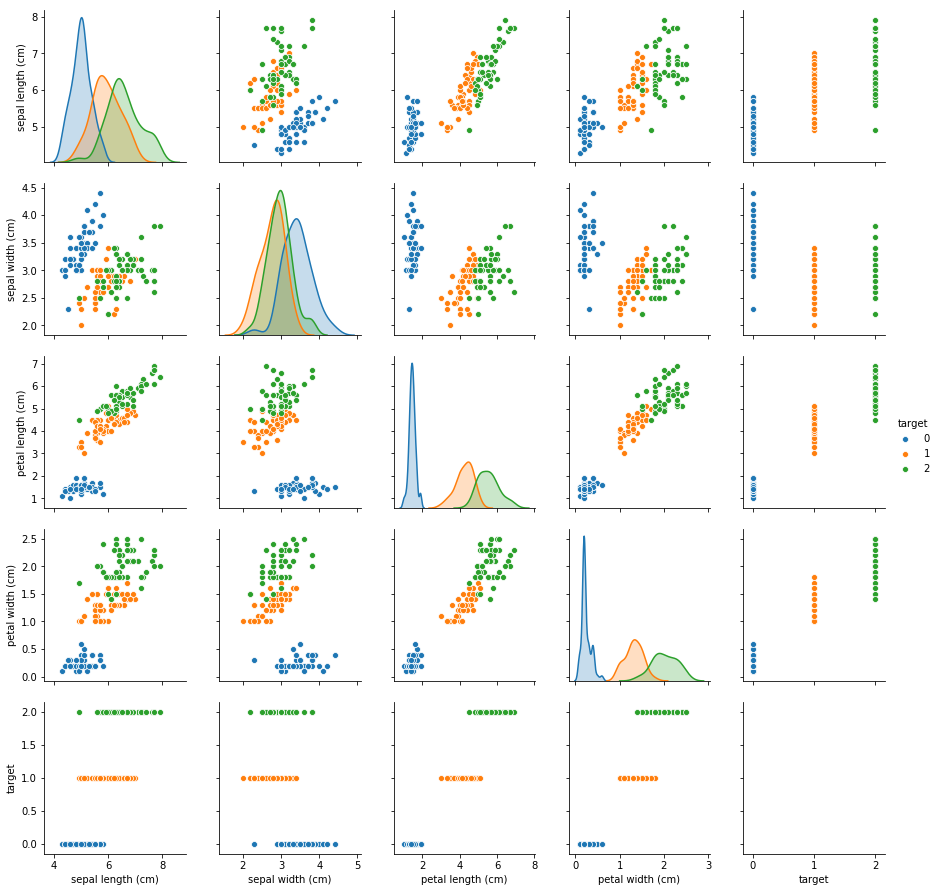

In [24]:
sns.pairplot(irisdf, hue = 'target')


In [25]:
bestIndividual = neat.nn.FeedForwardNetwork.create(data[1], data[0].config)

In [26]:
irisdf['preds'] = [np.argmax(bestIndividual.activate(x)) for x in xs]
irisdf['correct'] = irisdf.apply(lambda x: x['target'] == x['preds'], axis=1)

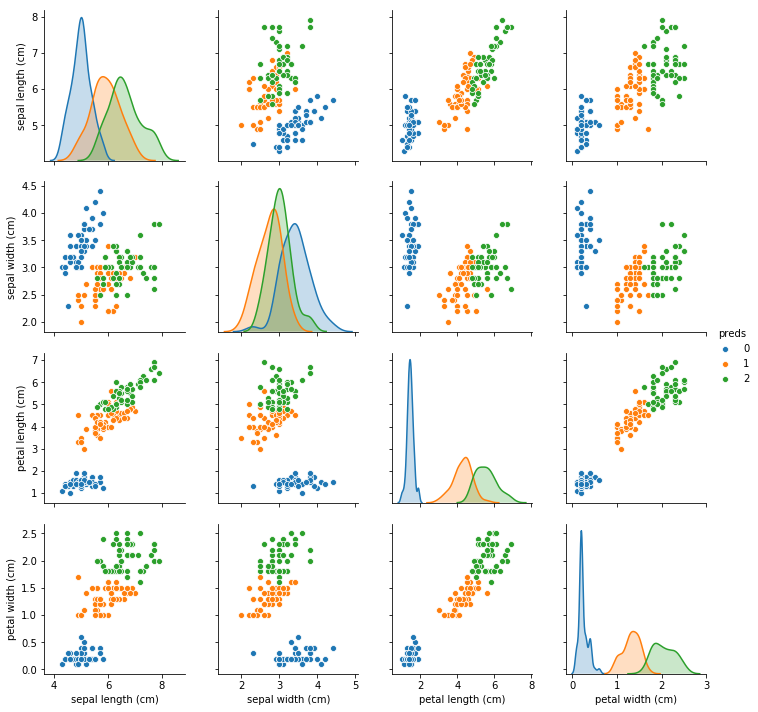

In [36]:
t = sns.pairplot(irisdf, hue = 'preds', vars=iris.feature_names)

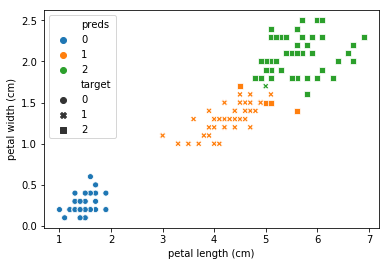

In [37]:
sns.scatterplot(x='petal length (cm)', 
                y='petal width (cm)', 
                hue='preds', 
                style='target', 
                data=irisdf,
               palette=t.palette)

In [38]:
if not os.path.exists('decisions_long_10_17'):
    os.makedirs('decisions_long_10_17')
if not os.path.exists('decisions_space_long_10_17'):
    os.makedirs('decisions_space_long_10_17')
if not os.path.exists('decision_volume_long_10_17'):
    os.makedirs('decision_volume_long_10_17')

In [39]:
u_p = np.linspace(irisdf[iris.feature_names[0]].min(), irisdf[iris.feature_names[0]].max(), 10)
x_p = np.linspace(irisdf[iris.feature_names[1]].min(), irisdf[iris.feature_names[1]].max(), 15)
y_p = np.linspace(irisdf[iris.feature_names[2]].min(), irisdf[iris.feature_names[2]].max(), 15)
z_p = np.linspace(irisdf[iris.feature_names[3]].min(), irisdf[iris.feature_names[3]].max(), 15)
decision_space_raw = np.vstack(np.meshgrid(u_p, x_p,y_p,z_p)).reshape(4,-1).T
decision_space_scaled = scaler.transform(decision_space_raw)
decision_space = pd.DataFrame(decision_space_raw)
decision_space.columns = iris.feature_names

In [76]:
if not os.path.exists('decision_lenwid_long_10_17'):
    os.makedirs('decision_lenwid_long_10_17')
if not os.path.exists('decision_lenwidspace_long_10_17'):
    os.makedirs('decision_lenwidspace_long_10_17')

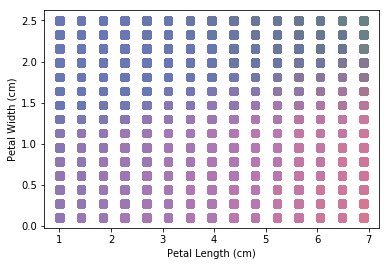

In [132]:
petal_len_wid_space = sns.scatterplot(x='petal length (cm)', 
                y='petal width (cm)', 
                hue='preds', 
                data=decision_space,
              size=500,
            style=1,
              x_jitter=0.5,
              y_jitter=0.5,
              size_norm=(10,11),
              alpha=0.005,
                markers=['s'],
               palette=t.palette)
petal_len_wid_space.set(xlabel='Petal Length (cm)', ylabel='Petal Width (cm)')
petal_len_wid_space.legend_.remove()

# petal_len_wid_space.figure.clf()

In [147]:
config = p.config
decisionBoundaryString = 'decisions_long_10_17/decision{:0>10}.png'
decisionSpaceBoundaryString = 'decisions_space_long_10_17/space{:0>10}.png'
volumeSpaceBoundaryString = 'decision_volume_long_10_17/volume{:0>10}.png'
lenWidString = 'decision_lenwid_long_10_17/volume{:0>10}.png'
lenWidSpaceString = 'decision_lenwidspace_long_10_17/lenwidspace{:0>10}.png'

fitnesses = []

for generation in range(max(ancestry) + 1):
# for generation in range(1):
#     generation = 6
    print('Fitness for gen %s' % generation)
    bestFitness = 0
    bestGenome = None
    for genome, fitness in ancestry[generation].items():
        if fitness is None:
            continue
        if fitness > bestFitness:
            bestGenome = genome
            bestFitness = fitness

#     ancestryFitness[generation] = bestFitness
#     fitnessPlotString = fitnessTemplateString.format(generation)
#     fitnessImageFiles.append(fitnessPlotString)
#     plot_stats_for_ancestry(statistics, ancestryFitness, filename=fitnessPlotString)

    bestNet = neat.nn.FeedForwardNetwork.create(ancestors[bestGenome], config)

    decisionFileString = decisionBoundaryString.format(generation)
    decisionBoundaryFileString = decisionSpaceBoundaryString.format(generation)
    lenWidFileString = lenWidString.format(generation)
    lenWidSpaceFileString = lenWidSpaceString.format(generation)

    volumeFileString = volumeSpaceBoundaryString.format(generation)

    
    irisdf['preds'] = [np.argmax(bestNet.activate(x)) for x in xs]
    irisdf['correct'] = irisdf.apply(lambda x: x['target'] == x['preds'], axis=1)
    fitnesses.append((generation, irisdf['correct'].mean()))

    
#     sns_plot = sns.pairplot(irisdf, hue = 'preds', vars=iris.feature_names)
    
#     sns_plot.savefig(decisionFileString)
    
    
    decision_space['preds'] = [np.argmax(bestNet.activate(x)) for x in decision_space_scaled]
    
#     space_plot = sns.pairplot(decision_space, 
#              hue = 'preds', 
#              vars=iris.feature_names,
#              plot_kws={'alpha':0.0025})
#     space_plot.savefig(decisionBoundaryFileString)
    
    petal_len_wid_plot = sns.scatterplot(x='petal length (cm)', 
                y='petal width (cm)', 
                hue='preds', 
                style='target', 
                data=irisdf,
               palette=t.palette)
    petal_len_wid_plot.set(xlabel='Petal Length (cm)', ylabel='Petal Width (cm)')
    petal_len_wid_plot.legend_.remove()
    petal_len_wid_plot.figure.savefig(lenWidFileString)
    petal_len_wid_plot.figure.clf()
    
    
    decision_space['preds'] = [np.argmax(bestNet.activate(x)) for x in decision_space_scaled]

    petal_len_wid_space = sns.scatterplot(x='petal length (cm)', 
            y='petal width (cm)', 
            hue='preds', 
            data=decision_space[['sepal width (cm)','petal length (cm)','petal width (cm)','preds']].drop_duplicates(),
          size=500,
        style=1,
          size_norm=(10,11),
          alpha=0.1,
            markers=['s'],
           palette=t.palette)
    petal_len_wid_space.set(xlabel='Petal Length (cm)', ylabel='Petal Width (cm)')
    petal_len_wid_space.legend_.remove()


    petal_len_wid_space.figure.savefig(lenWidSpaceFileString)
    petal_len_wid_space.figure.clf()
    


    
    # 3dspace
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     ax.scatter(decision_space['sepal width (cm)'], 
#                decision_space['petal length (cm)'], 
#                decision_space['petal width (cm)'], 
#                c=decision_space['preds'], 
#                s=60,
#                alpha=0.005,
#                cmap= matplotlib.colors.ListedColormap( [(32/255, 119/255, 180/255), (255/255, 158/255, 78/255), (94/255, 180/255, 93/255)]))

#     ax.view_init(30, 185)
#     plt.xlabel('Sepal Width (cm)')
#     plt.ylabel('Petal length (cm)')
#     # plt.zlabel('Petal Width (cm)')
#     plt.savefig(volumeFileString)
#     plt.clf()


    
#     plot_net_decisions_2d(bestNet, filename=decisionFileString)
#     decisionImageFiles.append(decisionFileString)


Fitness for gen 0
Fitness for gen 1
Fitness for gen 2
Fitness for gen 3
Fitness for gen 4
Fitness for gen 5
Fitness for gen 6
Fitness for gen 7
Fitness for gen 8
Fitness for gen 9
Fitness for gen 10
Fitness for gen 11
Fitness for gen 12
Fitness for gen 13
Fitness for gen 14
Fitness for gen 15
Fitness for gen 16
Fitness for gen 17
Fitness for gen 18
Fitness for gen 19
Fitness for gen 20
Fitness for gen 21
Fitness for gen 22
Fitness for gen 23
Fitness for gen 24
Fitness for gen 25
Fitness for gen 26
Fitness for gen 27
Fitness for gen 28
Fitness for gen 29
Fitness for gen 30
Fitness for gen 31
Fitness for gen 32
Fitness for gen 33
Fitness for gen 34
Fitness for gen 35
Fitness for gen 36
Fitness for gen 37
Fitness for gen 38
Fitness for gen 39
Fitness for gen 40
Fitness for gen 41
Fitness for gen 42
Fitness for gen 43
Fitness for gen 44
Fitness for gen 45
Fitness for gen 46
Fitness for gen 47
Fitness for gen 48
Fitness for gen 49


<Figure size 432x288 with 0 Axes>

In [137]:
decision_space[['sepal width (cm)','petal length (cm)','petal width (cm)','preds']].drop_duplicates()

,sepal width (cm),petal length (cm),petal width (cm),preds
0,2.0,1.000000,0.100000,1
1,2.0,1.000000,0.271429,1
2,2.0,1.000000,0.442857,1
3,2.0,1.000000,0.614286,1
4,2.0,1.000000,0.785714,1
5,2.0,1.000000,0.957143,1
6,2.0,1.000000,1.128571,1
7,2.0,1.000000,1.300000,1
8,2.0,1.000000,1.471429,2
9,2.0,1.000000,1.642857,2


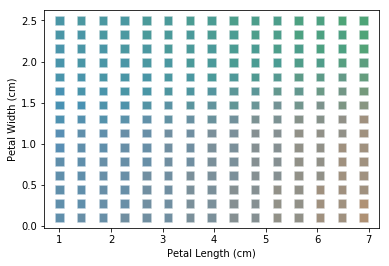

In [145]:
petal_len_wid_space = sns.scatterplot(x='petal length (cm)', 
            y='petal width (cm)', 
            hue='preds', 
            data=decision_space[['sepal width (cm)','petal length (cm)','petal width (cm)','preds']].drop_duplicates(),
          size=500,
        style=1,
          size_norm=(10,11),
          alpha=0.1,
            markers=['s'],
           palette=t.palette)
petal_len_wid_space.set(xlabel='Petal Length (cm)', ylabel='Petal Width (cm)')
petal_len_wid_space.legend_.remove()


In [28]:
fitnesses

NameError: name 'fitnesses' is not defined

In [29]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [30]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [31]:
u_p = np.linspace(irisdf[iris.feature_names[0]].min(), irisdf[iris.feature_names[0]].max(), 20)
x_p = np.linspace(irisdf[iris.feature_names[1]].min(), irisdf[iris.feature_names[1]].max(), 20)
y_p = np.linspace(irisdf[iris.feature_names[2]].min(), irisdf[iris.feature_names[2]].max(), 20)
z_p = np.linspace(irisdf[iris.feature_names[3]].min(), irisdf[iris.feature_names[3]].max(), 20)
decision_space_raw = np.vstack(np.meshgrid(u_p, x_p,y_p,z_p)).reshape(4,-1).T
decision_space_scaled = scaler.transform(decision_space_raw)
decision_space = pd.DataFrame(decision_space_raw)
decision_space.columns = iris.feature_names

In [32]:
decision_space['preds'] = [np.argmax(bestNet.activate(x)) for x in decision_space_scaled]

NameError: name 'bestNet' is not defined

In [33]:
decision_space.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,4.3,2.0,1.0,0.100000
1,4.3,2.0,1.0,0.226316
2,4.3,2.0,1.0,0.352632
3,4.3,2.0,1.0,0.478947
4,4.3,2.0,1.0,0.605263


KeyError: 'preds'

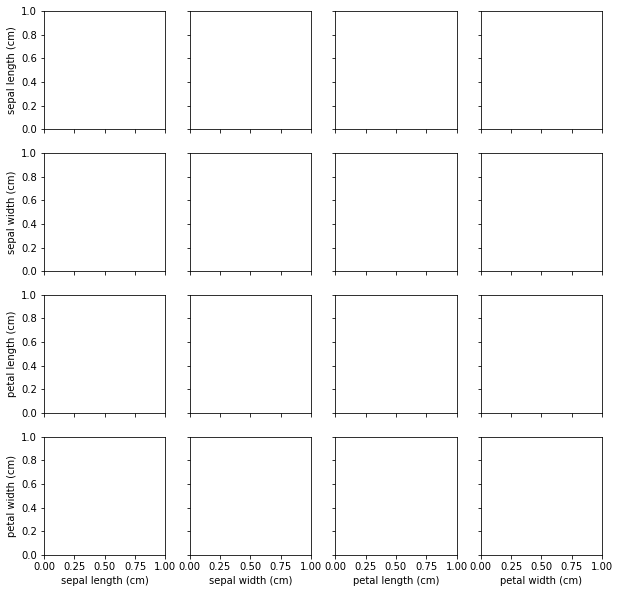

In [34]:
sns.pairplot(decision_space, 
             hue = 'preds', 
             vars=iris.feature_names,
             plot_kws={'alpha':0.0025})

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(irisdf['sepal width (cm)'], 
           irisdf['petal length (cm)'], 
           irisdf['petal width (cm)'], 
           c=irisdf['preds'], 
           s=irisdf['target'],
          alpha=1,
          cmap= matplotlib.colors.ListedColormap( [(32/255, 119/255, 180/255), (255/255, 158/255, 78/255), (94/255, 180/255, 93/255)]))
ax.view_init(30, 185)
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal length (cm)')
# plt.zlabel('Petal Width (cm)')
plt.show()


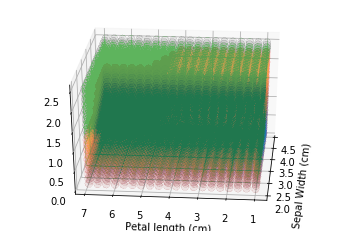

In [38]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(decision_space['sepal width (cm)'], 
           decision_space['petal length (cm)'], 
           decision_space['petal width (cm)'], 
           c=decision_space['preds'], 
           s=60,
          alpha=0.005,
          cmap= matplotlib.colors.ListedColormap( [(32/255, 119/255, 180/255), (255/255, 158/255, 78/255), (94/255, 180/255, 93/255)]))
ax.view_init(30, 185)
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal length (cm)')
# plt.zlabel('Petal Width (cm)')
plt.show()


In [39]:
current_palette = sns.color_palette()

In [40]:
current_palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [41]:
decision_space.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),preds
0,4.3,2.0,1.0,0.100000,0
1,4.3,2.0,1.0,0.226316,0
2,4.3,2.0,1.0,0.352632,0
3,4.3,2.0,1.0,0.478947,0
4,4.3,2.0,1.0,0.605263,0


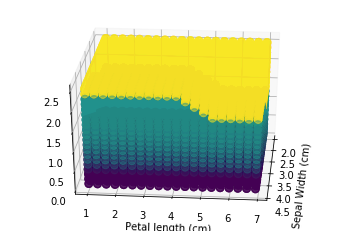

In [42]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(decision_space['sepal width (cm)'], 
           decision_space['petal length (cm)'], 
           decision_space['petal width (cm)'], 
           c=decision_space['preds'], 
           s=60,
          alpha=0.1)
ax.view_init(30, 5)
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal length (cm)')
# plt.zlabel('Petal Width (cm)')
plt.show()


In [43]:
fitnesses

[(0, 0.7533333333333333),
 (1, 0.7533333333333333),
 (2, 0.7533333333333333),
 (3, 0.8),
 (4, 0.78),
 (5, 0.78),
 (6, 0.78),
 (7, 0.78),
 (8, 0.84),
 (9, 0.84),
 (10, 0.84),
 (11, 0.86),
 (12, 0.86),
 (13, 0.8533333333333334),
 (14, 0.8533333333333334),
 (15, 0.8666666666666667),
 (16, 0.8666666666666667),
 (17, 0.8666666666666667),
 (18, 0.8266666666666667),
 (19, 0.8333333333333334),
 (20, 0.8466666666666667),
 (21, 0.8466666666666667),
 (22, 0.86),
 (23, 0.8333333333333334),
 (24, 0.8333333333333334),
 (25, 0.8333333333333334),
 (26, 0.8333333333333334),
 (27, 0.8333333333333334),
 (28, 0.8333333333333334),
 (29, 0.84),
 (30, 0.84),
 (31, 0.84),
 (32, 0.84),
 (33, 0.84),
 (34, 0.84),
 (35, 0.8333333333333334),
 (36, 0.8466666666666667),
 (37, 0.8466666666666667),
 (38, 0.88),
 (39, 0.88),
 (40, 0.88),
 (41, 0.8933333333333333),
 (42, 0.8933333333333333),
 (43, 0.8933333333333333),
 (44, 0.8933333333333333),
 (45, 0.8933333333333333),
 (46, 0.8933333333333333),
 (47, 0.89333333333333

In [59]:
 with gzip.open(os.path.join('./../data/experiments/iris/experiment-longepochsttsplit-10-0', 'train_test_data.pkl'), 'r') as f: 
        X_train, X_test, y_train, y_test = pickle.load(f)

In [75]:
iris_test_df = pd.DataFrame(X_test.numpy())
iris_test_df.columns = iris.feature_names
iris_test_df['target'] = y_test.numpy()

iris_train_df = pd.DataFrame(X_train.numpy())
iris_train_df.columns = iris.feature_names
iris_train_df['target'] = y_train.numpy()

ValueError: Length mismatch: Expected axis has 30 elements, new values have 4 elements

In [68]:
config = p.config
# decisionBoundaryString = 'decisions_long_10_17/decision{:0>10}.png'
# decisionSpaceBoundaryString = 'decisions_space_long_10_17/space{:0>10}.png'
# volumeSpaceBoundaryString = 'decision_volume_long_10_17/volume{:0>10}.png'

fitnesses_test = []
fitnesses_train = []


for generation in range(max(ancestry) + 1):
    print('Fitness for gen %s' % generation)
    bestFitness = 0
    bestGenome = None
    for genome, fitness in ancestry[generation].items():
        if fitness is None:
            continue
        if fitness > bestFitness:
            bestGenome = genome
            bestFitness = fitness

#     ancestryFitness[generation] = bestFitness
#     fitnessPlotString = fitnessTemplateString.format(generation)
#     fitnessImageFiles.append(fitnessPlotString)
#     plot_stats_for_ancestry(statistics, ancestryFitness, filename=fitnessPlotString)

    bestNet = neat.nn.FeedForwardNetwork.create(ancestors[bestGenome], config)

#     decisionFileString = decisionBoundaryString.format(generation)
#     decisionBoundaryFileString = decisionSpaceBoundaryString.format(generation)
#     volumeFileString = volumeSpaceBoundaryString.format(generation)

#     iris_test_df['preds'] = [np.argmax(bestNet.activate(x)) for x in X_test]

    iris_test_df['preds'] = [np.argmax(bestNet.activate(x)) for x in X_test]
    iris_test_df['correct'] = iris_test_df.apply(lambda x: x['target'] == x['preds'], axis=1)
    fitnesses_test.append((generation, iris_test_df['correct'].mean()))
    
    iris_train_df['preds'] = [np.argmax(bestNet.activate(x)) for x in X_train]
    iris_train_df['correct'] = iris_train_df.apply(lambda x: x['target'] == x['preds'], axis=1)
    fitnesses_train.append((generation, iris_train_df['correct'].mean()))


Fitness for gen 0
Fitness for gen 1
Fitness for gen 2
Fitness for gen 3
Fitness for gen 4
Fitness for gen 5
Fitness for gen 6
Fitness for gen 7
Fitness for gen 8
Fitness for gen 9
Fitness for gen 10
Fitness for gen 11
Fitness for gen 12
Fitness for gen 13
Fitness for gen 14
Fitness for gen 15
Fitness for gen 16
Fitness for gen 17
Fitness for gen 18
Fitness for gen 19
Fitness for gen 20
Fitness for gen 21
Fitness for gen 22
Fitness for gen 23
Fitness for gen 24
Fitness for gen 25
Fitness for gen 26
Fitness for gen 27
Fitness for gen 28
Fitness for gen 29
Fitness for gen 30
Fitness for gen 31
Fitness for gen 32
Fitness for gen 33
Fitness for gen 34
Fitness for gen 35
Fitness for gen 36
Fitness for gen 37
Fitness for gen 38
Fitness for gen 39
Fitness for gen 40
Fitness for gen 41
Fitness for gen 42
Fitness for gen 43
Fitness for gen 44
Fitness for gen 45
Fitness for gen 46
Fitness for gen 47
Fitness for gen 48
Fitness for gen 49
Fitness for gen 50
Fitness for gen 51
Fitness for gen 52
Fit

KeyError: None

In [69]:
fitnesses_train

[(0, 0.8380952380952381),
 (1, 0.8380952380952381),
 (2, 0.9047619047619048),
 (3, 0.9047619047619048),
 (4, 0.9047619047619048),
 (5, 0.8952380952380953),
 (6, 0.8952380952380953),
 (7, 0.8952380952380953),
 (8, 0.8952380952380953),
 (9, 0.8952380952380953),
 (10, 0.8952380952380953),
 (11, 0.9047619047619048),
 (12, 0.9047619047619048),
 (13, 0.9142857142857143),
 (14, 0.9142857142857143),
 (15, 0.9142857142857143),
 (16, 0.8952380952380953),
 (17, 0.8952380952380953),
 (18, 0.8952380952380953),
 (19, 0.8952380952380953),
 (20, 0.8952380952380953),
 (21, 0.8952380952380953),
 (22, 0.8952380952380953),
 (23, 0.8952380952380953),
 (24, 0.8571428571428571),
 (25, 0.8571428571428571),
 (26, 0.8476190476190476),
 (27, 0.8476190476190476),
 (28, 0.8571428571428571),
 (29, 0.8666666666666667),
 (30, 0.8666666666666667),
 (31, 0.8666666666666667),
 (32, 0.8857142857142857),
 (33, 0.8857142857142857),
 (34, 0.8857142857142857),
 (35, 0.8857142857142857),
 (36, 0.8857142857142857),
 (37, 0.885

In [70]:
fitnesses_test

[(0, 0.8),
 (1, 0.8),
 (2, 0.9333333333333333),
 (3, 0.9111111111111111),
 (4, 0.9111111111111111),
 (5, 0.9333333333333333),
 (6, 0.9333333333333333),
 (7, 0.9333333333333333),
 (8, 0.9333333333333333),
 (9, 0.9333333333333333),
 (10, 0.9333333333333333),
 (11, 0.9111111111111111),
 (12, 0.9111111111111111),
 (13, 0.9111111111111111),
 (14, 0.9111111111111111),
 (15, 0.9111111111111111),
 (16, 0.8888888888888888),
 (17, 0.8888888888888888),
 (18, 0.8888888888888888),
 (19, 0.8888888888888888),
 (20, 0.8888888888888888),
 (21, 0.8888888888888888),
 (22, 0.8888888888888888),
 (23, 0.8888888888888888),
 (24, 0.8444444444444444),
 (25, 0.8444444444444444),
 (26, 0.8444444444444444),
 (27, 0.8444444444444444),
 (28, 0.8444444444444444),
 (29, 0.8444444444444444),
 (30, 0.8444444444444444),
 (31, 0.8444444444444444),
 (32, 0.8666666666666667),
 (33, 0.8666666666666667),
 (34, 0.8666666666666667),
 (35, 0.8666666666666667),
 (36, 0.8666666666666667),
 (37, 0.8666666666666667),
 (38, 0.866666

In [105]:
 with gzip.open(os.path.join('./../data/experiments/breast-cancer/experiment-longepochsttsplit-10-0', 'train_test_data.pkl'), 'r') as f: 
        X_train, X_test, y_train, y_test = pickle.load(f)

In [106]:
with gzip.open(filePath, 'rb') as f: 
    data = pickle.load(f)     

In [123]:
bc_test_df = pd.DataFrame(X_test.numpy())
bc_test_df.columns = breast_cancer.feature_names
bc_test_df['target'] = y_test.numpy()

bc_train_df = pd.DataFrame(X_train.numpy())
bc_train_df.columns = breast_cancer.feature_names
bc_train_df['target'] = y_train.numpy()

In [135]:
config = p.config
# decisionBoundaryString = 'decisions_long_10_17/decision{:0>10}.png'
# decisionSpaceBoundaryString = 'decisions_space_long_10_17/space{:0>10}.png'
# volumeSpaceBoundaryString = 'decision_volume_long_10_17/volume{:0>10}.png'

fitnesses_test = []
fitnesses_train = []


for generation in range(max(ancestry) + 1):
# for generation in range(5):
    print('Fitness for gen %s' % generation)
    bestFitness = 0
    bestGenome = None
    for genome, fitness in ancestry[generation].items():
        if fitness is None:
            continue
        if fitness > bestFitness:
            bestGenome = genome
            bestFitness = fitness

#     ancestryFitness[generation] = bestFitness
#     fitnessPlotString = fitnessTemplateString.format(generation)
#     fitnessImageFiles.append(fitnessPlotString)
#     plot_stats_for_ancestry(statistics, ancestryFitness, filename=fitnessPlotString)

    bestNet = neat.nn.FeedForwardNetwork.create(ancestors[bestGenome], config)

#     decisionFileString = decisionBoundaryString.format(generation)
#     decisionBoundaryFileString = decisionSpaceBoundaryString.format(generation)
#     volumeFileString = volumeSpaceBoundaryString.format(generation)

    
    bc_test_df['preds'] = [np.round(bestNet.activate(x))[0] for x in X_test]
    bc_test_df['correct'] = bc_test_df.apply(lambda x: x['target'] == x['preds'], axis=1)
    fitnesses_test.append((generation, bc_test_df['correct'].mean()))
    
    bc_train_df['preds'] = [np.round(bestNet.activate(x))[0] for x in X_train]
    bc_train_df['correct'] = bc_train_df.apply(lambda x: x['target'] == x['preds'], axis=1)
    fitnesses_train.append((generation, bc_train_df['correct'].mean()))


Fitness for gen 0
Fitness for gen 1
Fitness for gen 2
Fitness for gen 3
Fitness for gen 4
Fitness for gen 5
Fitness for gen 6
Fitness for gen 7
Fitness for gen 8
Fitness for gen 9
Fitness for gen 10
Fitness for gen 11
Fitness for gen 12
Fitness for gen 13
Fitness for gen 14
Fitness for gen 15
Fitness for gen 16
Fitness for gen 17
Fitness for gen 18
Fitness for gen 19
Fitness for gen 20
Fitness for gen 21
Fitness for gen 22
Fitness for gen 23
Fitness for gen 24
Fitness for gen 25
Fitness for gen 26
Fitness for gen 27
Fitness for gen 28
Fitness for gen 29
Fitness for gen 30
Fitness for gen 31
Fitness for gen 32
Fitness for gen 33
Fitness for gen 34
Fitness for gen 35
Fitness for gen 36
Fitness for gen 37
Fitness for gen 38
Fitness for gen 39
Fitness for gen 40
Fitness for gen 41
Fitness for gen 42
Fitness for gen 43
Fitness for gen 44
Fitness for gen 45
Fitness for gen 46
Fitness for gen 47
Fitness for gen 48
Fitness for gen 49
Fitness for gen 50
Fitness for gen 51
Fitness for gen 52
Fit

In [136]:
bc_test_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,preds,correct
0,-0.470694,-0.160486,-0.448110,-0.491999,0.234114,0.027651,-0.109847,-0.276232,0.413949,0.132176,...,-0.356299,0.448503,-0.104741,-0.024412,-0.199563,0.183204,0.196958,1.0,1.0,True
1,1.366877,0.470149,1.302886,1.351264,-0.446227,-0.027309,0.241064,0.789060,-0.838325,-1.160679,...,1.732277,-0.572873,-0.131459,-0.016736,0.978975,-0.565828,-1.000578,0.0,0.0,True
2,0.378508,0.044296,0.400820,0.267377,0.913744,0.340350,0.725686,0.824140,0.435855,-0.685782,...,0.484159,0.974533,-0.094562,0.512911,0.560244,-0.103143,-0.208132,0.0,0.0,True
3,-0.490575,-0.374576,-0.432457,-0.532101,0.643316,0.516599,-0.142993,-0.539846,-0.002259,1.165609,...,-0.641257,0.553709,0.054930,-0.152986,-0.622863,-0.557739,0.534440,1.0,1.0,True
4,-0.734828,-1.128546,-0.713374,-0.716683,0.247636,0.145150,-0.269044,-0.592724,0.023298,0.711976,...,-0.743216,0.093432,-0.270137,-0.443716,-0.691687,-0.924975,-0.144403,1.0,1.0,True
5,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,0.0,0.0,True
6,2.238801,0.607446,2.274975,2.352388,0.707364,1.725703,1.958584,2.609857,0.045204,-0.198126,...,2.366883,-0.130131,0.853922,0.975872,1.958046,-0.258450,0.099426,0.0,0.0,True
7,0.977778,-0.986595,0.948650,0.853831,0.150139,0.215270,0.124931,0.789576,-0.265127,-0.185367,...,0.608971,-0.301091,0.171344,-0.111727,0.471930,-0.234183,-0.263547,0.0,0.0,True
8,-0.223602,-0.798102,-0.225682,-0.383638,0.814113,0.931636,0.352803,0.540406,0.476015,0.882089,...,-0.467048,0.930698,1.430264,1.024806,0.855640,1.013126,0.978321,1.0,1.0,True
9,-0.064554,-0.621245,-0.123531,-0.157817,-1.998346,-0.969387,-0.835650,-0.916438,0.005043,-1.054359,...,-0.284225,-1.688935,-0.341385,-0.641853,-0.797664,-0.358752,-0.386016,1.0,1.0,True


In [137]:
fitnesses_test

[(0, 0.9565217391304348),
 (1, 0.9420289855072463),
 (2, 0.9565217391304348),
 (3, 0.9855072463768116),
 (4, 0.9855072463768116),
 (5, 0.9855072463768116),
 (6, 0.9855072463768116),
 (7, 0.9855072463768116),
 (8, 0.9710144927536232),
 (9, 0.9855072463768116),
 (10, 0.9855072463768116),
 (11, 0.9855072463768116),
 (12, 0.9855072463768116),
 (13, 0.9855072463768116),
 (14, 0.9855072463768116),
 (15, 0.9855072463768116),
 (16, 0.9855072463768116),
 (17, 0.9855072463768116),
 (18, 0.9855072463768116),
 (19, 0.9855072463768116),
 (20, 0.9855072463768116),
 (21, 0.9855072463768116),
 (22, 0.9855072463768116),
 (23, 0.9855072463768116),
 (24, 0.9855072463768116),
 (25, 0.9855072463768116),
 (26, 0.9855072463768116),
 (27, 0.9855072463768116),
 (28, 0.9855072463768116),
 (29, 0.9855072463768116),
 (30, 0.9855072463768116),
 (31, 0.9855072463768116),
 (32, 0.9855072463768116),
 (33, 0.9855072463768116),
 (34, 0.9855072463768116),
 (35, 0.9855072463768116),
 (36, 0.9855072463768116),
 (37, 0.971

In [138]:
fitnesses_train

[(0, 0.886),
 (1, 0.906),
 (2, 0.948),
 (3, 0.964),
 (4, 0.97),
 (5, 0.97),
 (6, 0.97),
 (7, 0.97),
 (8, 0.964),
 (9, 0.964),
 (10, 0.966),
 (11, 0.966),
 (12, 0.974),
 (13, 0.98),
 (14, 0.98),
 (15, 0.97),
 (16, 0.97),
 (17, 0.968),
 (18, 0.968),
 (19, 0.976),
 (20, 0.976),
 (21, 0.976),
 (22, 0.976),
 (23, 0.972),
 (24, 0.978),
 (25, 0.978),
 (26, 0.98),
 (27, 0.98),
 (28, 0.978),
 (29, 0.978),
 (30, 0.978),
 (31, 0.978),
 (32, 0.978),
 (33, 0.98),
 (34, 0.98),
 (35, 0.982),
 (36, 0.982),
 (37, 0.976),
 (38, 0.98),
 (39, 0.98),
 (40, 0.982),
 (41, 0.982),
 (42, 0.982),
 (43, 0.982),
 (44, 0.982),
 (45, 0.982),
 (46, 0.98),
 (47, 0.98),
 (48, 0.98),
 (49, 0.98),
 (50, 0.98),
 (51, 0.98),
 (52, 0.98),
 (53, 0.982),
 (54, 0.982),
 (55, 0.982),
 (56, 0.982),
 (57, 0.982),
 (58, 0.982),
 (59, 0.982),
 (60, 0.982),
 (61, 0.982),
 (62, 0.982),
 (63, 0.982),
 (64, 0.982),
 (65, 0.982),
 (66, 0.982),
 (67, 0.984),
 (68, 0.982),
 (69, 0.982),
 (70, 0.986),
 (71, 0.984),
 (72, 0.984),
 (73, 0.9

In [141]:
print(confusion_matrix(bc_test_df['target'], bc_test_df['preds']))

[[22  1]
 [ 0 46]]


In [88]:
def calculate_max_depth(genome):
    connections = {}
    def my_depth(connections, ix):
        if ix < 0:
            return 0
        depths = []
        for c in connections[ix]:
            depths.append(my_depth(connections, c))
        return max(depths) + 1
                
    for key, conn in  genome.connections.items():
        if not key[1] in connections:
            connections[key[1]] = []
        connections[key[1]].append(key[0])
    all_depths = {}
    for c in connections:
        all_depths[c] = my_depth(connections, c)
    return all_depths
calculate_max_depth(g)

{0: 4, 1: 2, 2: 2, 111: 1, 338: 1, 427: 1, 637: 3, 691: 1}

In [96]:
g.size()

(8, 15)

In [81]:
print(g)

Key: 1
Fitness: 0.9882565140724182
Nodes:
	0 DefaultNodeGene(key=0, bias=0.7717456817626953, response=1.0, activation=sigmoid, aggregation=sum)
	1 DefaultNodeGene(key=1, bias=-1.6827856302261353, response=1.0, activation=sigmoid, aggregation=sum)
	2 DefaultNodeGene(key=2, bias=0.16188950836658478, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-4, 0), weight=-0.5932384729385376, enabled=True)
	DefaultConnectionGene(key=(-4, 1), weight=2.2876110076904297, enabled=True)
	DefaultConnectionGene(key=(-4, 2), weight=-0.4677996039390564, enabled=True)
	DefaultConnectionGene(key=(-3, 0), weight=0.29798248410224915, enabled=True)
	DefaultConnectionGene(key=(-3, 1), weight=-0.44962501525878906, enabled=True)
	DefaultConnectionGene(key=(-3, 2), weight=1.071747899055481, enabled=True)
	DefaultConnectionGene(key=(-2, 0), weight=0.07590899616479874, enabled=True)
	DefaultConnectionGene(key=(-2, 1), weight=-0.795971691608429, enabled=True)
	DefaultConnecti

In [150]:
ancestry

{49: {1491: 1.5605883598327637},
 48: {1491: 1.5605883598327637},
 47: {1491: 1.5605883598327637},
 46: {1491: 1.5605883598327637},
 45: {1450: 1.5589274168014526,
  1491: 1.5605883598327637,
  1382: 1.5589287281036377},
 44: {1450: 1.5589274168014526, 1382: 1.5589287281036377},
 43: {1382: 1.5589287281036377},
 42: {1353: 1.5577592849731445, 1382: 1.5589287281036377},
 41: {1353: 1.5577592849731445,
  1171: 1.5554625988006592,
  1278: 1.5577592849731445},
 40: {1171: 1.5554625988006592, 1278: 1.5577592849731445},
 39: {1171: 1.5554625988006592, 1278: 1.5577592849731445},
 38: {1171: 1.5554625988006592},
 37: {1171: 1.5554625988006592},
 36: {1171: 1.5554625988006592, 940: 1.5469787120819092},
 35: {1072: 1.5469787120819092, 940: 1.5469787120819092},
 34: {1072: 1.5469787120819092, 940: 1.5469787120819092},
 33: {1072: 1.5469787120819092,
  940: 1.5469787120819092,
  1031: 1.5326818227767944},
 32: {906: 1.5250897407531738,
  940: 1.5469787120819092,
  1031: 1.5326818227767944},
 31: {

In [153]:
print(ancestors[205])

Key: 205
Fitness: 1.3432189226150513
Nodes:
	0 DefaultNodeGene(key=0, bias=-0.2180914282798767, response=1.0, activation=sigmoid, aggregation=sum)
	1 DefaultNodeGene(key=1, bias=-0.5452741980552673, response=1.0, activation=sigmoid, aggregation=sum)
	2 DefaultNodeGene(key=2, bias=-0.4439423680305481, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-4, 0), weight=-1.1491025686264038, enabled=True)
	DefaultConnectionGene(key=(-4, 1), weight=-1.7313053607940674, enabled=True)
	DefaultConnectionGene(key=(-3, 0), weight=-0.4948740601539612, enabled=True)
	DefaultConnectionGene(key=(-3, 1), weight=1.4535444974899292, enabled=True)
	DefaultConnectionGene(key=(-3, 2), weight=0.8955893516540527, enabled=True)
	DefaultConnectionGene(key=(-2, 0), weight=1.9297173023223877, enabled=True)
	DefaultConnectionGene(key=(-2, 1), weight=-0.5675283670425415, enabled=True)
	DefaultConnectionGene(key=(-2, 2), weight=0.528621256351471, enabled=False)
	DefaultConnec

In [152]:
print(ancestors[266])

Key: 266
Fitness: 1.3899028301239014
Nodes:
	0 DefaultNodeGene(key=0, bias=-0.2180914282798767, response=1.0, activation=sigmoid, aggregation=sum)
	1 DefaultNodeGene(key=1, bias=-0.5452741980552673, response=1.0, activation=sigmoid, aggregation=sum)
	2 DefaultNodeGene(key=2, bias=-0.4439423680305481, response=1.0, activation=sigmoid, aggregation=sum)
	111 DefaultNodeGene(key=111, bias=-1.0099613666534424, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-4, 0), weight=-1.1491025686264038, enabled=True)
	DefaultConnectionGene(key=(-4, 111), weight=1.0, enabled=True)
	DefaultConnectionGene(key=(-3, 1), weight=1.4535444974899292, enabled=True)
	DefaultConnectionGene(key=(-3, 2), weight=0.8955893516540527, enabled=True)
	DefaultConnectionGene(key=(-3, 111), weight=0.4907352328300476, enabled=True)
	DefaultConnectionGene(key=(-2, 0), weight=1.9297173023223877, enabled=True)
	DefaultConnectionGene(key=(-2, 1), weight=-0.5675283670425415, enabled=Tru

{49: {1491: 1.5605883598327637},
 48: {1491: 1.5605883598327637},
 47: {1491: 1.5605883598327637},
 46: {1491: 1.5605883598327637},
 45: {1450: 1.5589274168014526,
  1491: 1.5605883598327637,
  1382: 1.5589287281036377},
 44: {1450: 1.5589274168014526, 1382: 1.5589287281036377},
 43: {1382: 1.5589287281036377},
 42: {1353: 1.5577592849731445, 1382: 1.5589287281036377},
 41: {1353: 1.5577592849731445,
  1171: 1.5554625988006592,
  1278: 1.5577592849731445},
 40: {1171: 1.5554625988006592, 1278: 1.5577592849731445},
 39: {1171: 1.5554625988006592, 1278: 1.5577592849731445},
 38: {1171: 1.5554625988006592},
 37: {1171: 1.5554625988006592},
 36: {1171: 1.5554625988006592, 940: 1.5469787120819092},
 35: {1072: 1.5469787120819092, 940: 1.5469787120819092},
 34: {1072: 1.5469787120819092, 940: 1.5469787120819092},
 33: {1072: 1.5469787120819092,
  940: 1.5469787120819092,
  1031: 1.5326818227767944},
 32: {906: 1.5250897407531738,
  940: 1.5469787120819092,
  1031: 1.5326818227767944},
 31: {

In [155]:
ancestors

{1: <neat.genome.DefaultGenome at 0x7fd9f3eae208>,
 2: <neat.genome.DefaultGenome at 0x7fd9f3eaeb00>,
 3: <neat.genome.DefaultGenome at 0x7fd9f3eae3c8>,
 4: <neat.genome.DefaultGenome at 0x7fd9f3ee3c50>,
 5: <neat.genome.DefaultGenome at 0x7fd9f3ee3a58>,
 6: <neat.genome.DefaultGenome at 0x7fdac0db4470>,
 7: <neat.genome.DefaultGenome at 0x7fdac0db4d30>,
 8: <neat.genome.DefaultGenome at 0x7fdac0db4240>,
 9: <neat.genome.DefaultGenome at 0x7fdac0db49e8>,
 10: <neat.genome.DefaultGenome at 0x7fd9fc500ba8>,
 11: <neat.genome.DefaultGenome at 0x7fd9fc500710>,
 12: <neat.genome.DefaultGenome at 0x7fd9fc500ac8>,
 13: <neat.genome.DefaultGenome at 0x7fdadb128208>,
 14: <neat.genome.DefaultGenome at 0x7fd9f4532828>,
 15: <neat.genome.DefaultGenome at 0x7fd9f373d7f0>,
 16: <neat.genome.DefaultGenome at 0x7fd9f3ede7b8>,
 17: <neat.genome.DefaultGenome at 0x7fd9f3ede5c0>,
 18: <neat.genome.DefaultGenome at 0x7fd9f3ede390>,
 19: <neat.genome.DefaultGenome at 0x7fd9f3ede978>,
 20: <neat.genome.Def